## 1. 라이브러리 imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

## 2. Intro

### **A. 대체 어떻게 저런 코드를 알아내는 거임???**
---




지난 시간 강의노트에서...

In [3]:
df_sample = pd.DataFrame(
    {'path':['A','A','B','B','B'],
     'lon':[-73.986420,-73.995300,-73.975922,-73.988922,-73.962654],
     'lat':[40.756569,40.740059,40.754192,40.762859,40.772449]}
)
fig = px.line_mapbox(
    data_frame=df_sample,
    lat = 'lat',
    lon = 'lon',
    color = 'path',
    line_group = 'path',
    #---#
    mapbox_style = 'carto-positron',
    zoom=12,
    width = 750,
    height = 600
)
scatter_data = px.scatter_mapbox(
    data_frame=df_sample,
    lat = 'lat',
    lon = 'lon',
    color = 'path',
    #---#
    mapbox_style = 'carto-positron',
    zoom=12,
    width = 750,
    height = 600
).data
fig.add_trace(scatter_data[0])
fig.add_trace(scatter_data[1])
fig.show(config={'scrollZoom':False})

> 도대체 이런 코드들은 어떻게 알아내는 걸까?


### **B. 심슨의 역설 데이터**
---




`-` 아래의 자료를 사용해서 `plotly`를 뜯어보자.

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1]).reset_index().melt(id_vars='index').set_axis(['department','gender','result','count'],axis=1)
df.head()

,department,gender,result,count
0,A,male,fail,314
1,B,male,fail,208
2,C,male,fail,204
3,D,male,fail,279
4,E,male,fail,137


### **C. `plotly`의 시각화 구조**
---




`-` 아래와 같은 방법이 가능하다.

`# 예시 1` `pandas backend`

In [5]:
df.pivot_table(index='gender',columns='result',values='count',aggfunc='sum')\
.assign(rate = lambda df:  df['pass']/(df['fail']+df['pass']))\
.assign(rate = lambda df:  np.round(df['rate'],2))\
.loc[:,'rate'].reset_index()\
.plot.bar(
    x='gender', y='rate',
    color='gender',
    text='rate',
    #---# 상단 : geom 관련 부분, 하단 : 세부 옵션 부분
    title='버클리대학교의 남녀합격률',
    width=600
)

`# 예시 2` `px.bar`를 이용한 `plot`(`ggplot`을 사용하는 것과 유사하다.)

In [6]:
tidydata = df.pivot_table(index='gender',columns='result',values='count',aggfunc='sum')\
.assign(rate = lambda df:  df['pass']/(df['fail']+df['pass']))\
.assign(rate = lambda df:  np.round(df['rate'],2))\
.loc[:,'rate'].reset_index()
#---#
px.bar(
    tidydata,
    x = 'gender', y = 'rate',
    color='gender',
    text='rate',
    #---#
    title='버클리대학교의 남녀합격률',
    width=600
)

`# 예시 3` `px.bar`를 이용한 플랏 1 (pandas Series를 입력) - 결과가 조금 다름

In [7]:
tidydata = df.pivot_table(index='gender',columns='result',values='count',aggfunc='sum')\
.assign(rate = lambda df:  df['pass']/(df['fail']+df['pass']))\
.assign(rate = lambda df:  np.round(df['rate'],2))\
.loc[:,'rate'].reset_index()
#---#
px.bar(
    x = tidydata.gender, y = tidydata.rate,
    color = tidydata.gender,
    text = tidydata.rate,
    #---#
    title = '버클리대학교의 남녀 합격률',
    width = 600
)

> `gender`의 범례가 `color`로 바뀌고, `label`이 `x`, `y`로 바뀌었다. 열 인덱스 정보가 날아간 모습

`# 예시 4` `px.bar`를 이용한 플랏 2 (list를 입력) - 위에꺼랑 똑같음. 이젠 타이디데이터도 필요없는 모습...

In [10]:
list(tidydata.gender), list(tidydata.rate)

(['female', 'male'], [0.42, 0.52])

In [11]:
px.bar(
    x = ['female', 'male'], y = [0.42, 0.52],
    color = ['female', 'male'],
    text = [0.42, 0.52],
    #---#
    title = '버클리대학교의 남녀 합격률',
    width = 600
)

`# 예시 5` `go`를 이용한 시각화 - 색상 시각화가 불가능 (완전 `ggplot() + geom_col()` 느낌)

In [13]:
fig = go.Figure()
fig

In [14]:
bar = go.Bar(
    x = ['female','male'], y = [0.42,0.52]
)

layout = {'title':'버클리대학교의 남녀합격률','width':600}

fig.add_trace(bar).update_layout(layout)  ## mapbox에 추가하는 것과 동일함

> `color`라는 옵션 자체가 없음...

`# 예시 6` `go`를 이용한 시각화 - `matplotlib`의 겹쳐그리기 감성 구현($\star$)

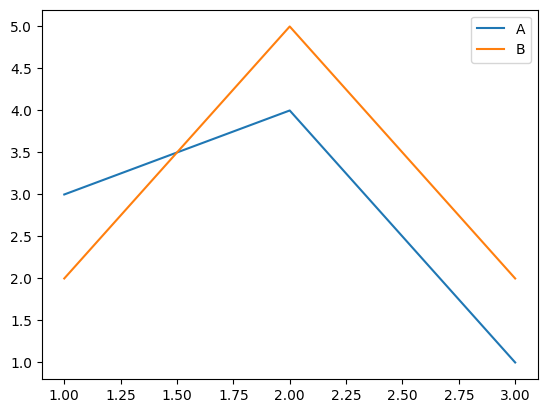

In [15]:
plt.plot([1,2,3],[3,4,1],label='A')
plt.plot([1,2,3],[2,5,2],label='B')
plt.legend()

> 이런 옛날 방식이 있었다... 이걸 응용하면...

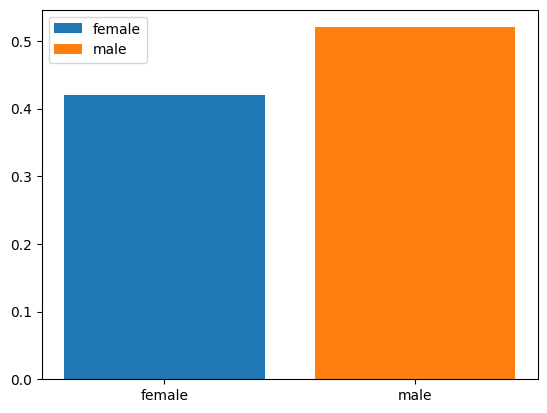

In [17]:
plt.bar('female', 0.42, label = 'female')  ## 아예 리스트도 없이 쌩으로 넣어버림
plt.bar('male', 0.52, label = 'male')
plt.legend()

plt.show()를 하기 전 계속해서 겹쳐 그리며 색상이 나뉘어졌다. 이것에서 힌트를 얻으면...!

In [21]:
fig = go.Figure()
bar_female = go.Bar(
    x = ['female'], y = [0.42],
    name = 'female',
    text = [0.42]
)
bar_male = go.Bar(
    x = ['male'], y = [0.52],
    name = 'male',
    text = [0.52]
)
layout = {'title' : '버클리대학교의 남녀 합격률', 'width' : 600}
fig.add_trace(bar_female).add_trace(bar_male).update_layout(layout)

`# 예시 7` `go`를 이용한 시각화 - 색상의 변경(남자는 파랑, 여자는 빨강으로?)

In [22]:
fig = go.Figure()
bar_female = go.Bar(
    x = ['female'], y = [0.42],
    name = 'female',
    text = [0.42],
    marker = {'color':'red'}
)  ## matplotlib에서 각 plot에 color를 지정해주는 것과 유사하다.
bar_male = go.Bar(
    x = ['male'], y = [0.52],
    name = 'male',
    text = [0.52],
    marker = {'color':'blue'}
)
layout = {'title':'버클리대학교의 남녀합격률','width':600}
fig.add_trace(bar_female).add_trace(bar_male)\
.update_layout(layout)

> 뭔가 맘에 안듦. 데이터 뜨는 것부터 색상, 인덱스 등 다 맘에 안듦.

`# 예시 8` `go`를 이용한 시각화 - 색상 재설정 + $x$축, $y$축, `legend`의 `title` 설정 + `hover` 설정

* 색상설정 : `#EF553B`,`#636efa`
* `hovertemplate` : `'gender=%{x}<br>rate=%{text}<extra></extra>'`

In [28]:
fig = go.Figure()
bar_female = go.Bar(
    x = ['female'], y = [0.42],
    name = 'female',    ## default는 trace_num
    text = [0.42],
    marker = {'color':'#EF553B'},   ## marker를 딕셔너리로 설정해줌
    hovertemplate = 'gender=%{x}<br>rate=%{text}<extra></extra>'    ## 뭘 띄울 것인지, html문법 사용?
)
bar_male = go.Bar(
    x = ['male'], y = [0.52],
    name = 'male',
    text = [0.52],
    marker = {'color':'#636efa'},
    hovertemplate = 'gender=%{x}<br>rate=%{text}<extra></extra>'
)
layout = {
    'title':'버클리대학교의 남녀합격률',
    'width':600,
    'legend':{'title':'gender'},
    'xaxis':{'title':'gender'},
    'yaxis':{'title':'rate'}
}
fig.add_trace(bar_female).add_trace(bar_male)\
.update_layout(layout)

**색상정보 `#EF553B` 이런 거 어떻게 알 수 있음??**

In [29]:
fig = df.pivot_table(index='gender',columns='result',values='count',aggfunc='sum')\
.assign(rate = lambda df:  df['pass']/(df['fail']+df['pass']))\
.assign(rate = lambda df:  np.round(df['rate'],2))\
.loc[:,'rate'].reset_index()\
.plot.bar(
    x='gender', y='rate',
    color='gender',
    text='rate',
    title='버클리대학교의 남녀합격률',
    width=600
)
fig.data

(Bar({
     'alignmentgroup': 'True',
     'hovertemplate': 'gender=%{x}<br>rate=%{text}<extra></extra>',
     'legendgroup': 'female',
     'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
     'name': 'female',
     'offsetgroup': 'female',
     'orientation': 'v',
     'showlegend': True,
     'text': array([0.42]),
     'textposition': 'auto',
     'x': array(['female'], dtype=object),
     'xaxis': 'x',
     'y': array([0.42]),
     'yaxis': 'y'
 }),
 Bar({
     'alignmentgroup': 'True',
     'hovertemplate': 'gender=%{x}<br>rate=%{text}<extra></extra>',
     'legendgroup': 'male',
     'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
     'name': 'male',
     'offsetgroup': 'male',
     'orientation': 'v',
     'showlegend': True,
     'text': array([0.52]),
     'textposition': 'auto',
     'x': array(['male'], dtype=object),
     'xaxis': 'x',
     'y': array([0.52]),
     'yaxis': 'y'
 }))

뒤에 `data`를 붙여서 개체를 뽑아먹을 수 있음. 여기서 들어가있는 값들을 적당히 따온 것...

### **D. `px` vs `go`**
---




`-` `go`는 핸드메이드 제품을, `px`는 양산품을 만든다고 이해하면 편리함.

* `go`의 특징 : 유저의 자유도가 매우 높음. 그림의 크기, 색상 등을 선호에 맞게 조정하기 유리. **but**, 생산성이 낮음
* `px`의 특징 : 유저의 자유도가 낮음. 원하는 그림을 빠르게 생산할 수 있음. **but**, 내가 원하는 디자인이 나오지 않을 수 있음.

`-` 그래서 뭘 쓰라고?

* `px`를 쓰는 게 좋다.
* 그런데 `go`를 이용하여 그림이 그려지는 원리를 이해하면 이후에 `px`를 이용한 그림을 수정하기 용이하다.

**전략 : `px`로 그림을 그린다 + `go`로 수정한다.**

## 3. `pio`를 이용한 시각화

### **A. 함수의 입력(예비학습)**
---




`# 예제 1` 두 벡터 x, y가 주어졌을 때, `R`에서 `cbind`와 같은 역할을 하는 함수를 구현하라.

In [40]:
def cbind(x, y) :
  return np.stack([x, y], axis = 1)

In [41]:
cbind([1,2,3],[3,4,5])

array([[1, 3],
       [2, 4],
       [3, 5]])

`# 예제 2` 세 개 이상의 벡터가 오도록 하려면?

> `*args`를 이용하여 이후 입력을 받음

In [42]:
def _cbind(x, y, *args) :
  ## args의 정체
  print(args)
  rslt = np.stack([x, y], axis = 1)

In [43]:
_cbind([1,1],[2,2],[3,3],[4,4])

([3, 3], [4, 4])


> `*args`는 함수 내에서 추가 인자를 튜플로 저장한다.

In [52]:
def cbind(x, *args) :
  rslt = np.stack([x] + list(args), axis = 1)
  return rslt

In [53]:
cbind([1,2,3], [2,3,4], [3,4,5], [4,5,6])

array([[1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6]])

`# 예제 3` 기본적으로 cbind의 동작을 하지만, 경우에 따라서 rbind처럼 동작하길 원한다면?

> `axis`라는 변수를 따로 생성하여 입력으로 처리, 기본값은 1

In [54]:
def bind(x, y, *args, axis = 1) :
  rslt = np.stack([x, y] + list(args), axis = axis)
  return rslt

In [60]:
display(bind([1,1,1], [2,2,2], [3,3,3], axis = 0))
display(bind([1,1,1], [2,2,2], [3,3,3]))

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

`# 예제 4` 여러가지 추가 옵션을 사용하여 print를 통제하고 싶다면?

In [70]:
def _bind(x, y, *args, axis = 1, **kwarg) :
  print(kwarg)
  rslt = np.stack([x, y] + list(args), axis = axis)
  return rslt

In [71]:
_bind([1,1,1], [2,2,2], verbose1 = True, verbose2 = True, verbose3 = True, verbose4 = True)  ## verbose : 상세한 로그 출력 여부(지금은 그냥 더미로 넣은 것)

{'verbose1': True, 'verbose2': True, 'verbose3': True, 'verbose4': True}


array([[1, 2],
       [1, 2],
       [1, 2]])

> `kwarg`에 인풋값이 딕셔너리 형태로 들어간다.

In [89]:
def bind(x, y, *args, axis = 1, **kwargs) :
  if ('vb1' in kwargs) and kwargs['vb1'] :
    print(f'위치인자 arguments : {x, y}')

  if ('vb2' in kwargs) and kwargs['vb2'] :
    print(f'가변위치인자 : {args}')

  if ('vb3' in kwargs) and kwargs['vb3'] :
        print(f'키워드인자: {axis}')

  if ('vb4' in kwargs) and kwargs['vb4'] :
        print(f'가변키워드인자: {kwargs}')

  rslt = np.stack([x,y]+list(args),axis=axis)
  return rslt

In [87]:
bind([1,1,1], [2,2,2], vb2 = True)

가변위치인자 : ()


array([[1, 2],
       [1, 2],
       [1, 2]])

In [92]:
bind([1,1,1],[2,2,2],[3,3,3],
     vb1=True,vb2=True,vb3=True,vb4=True)

위치인자 arguments : ([1, 1, 1], [2, 2, 2])
가변위치인자 : ([3, 3, 3],)
키워드인자: 1
가변키워드인자: {'vb1': True, 'vb2': True, 'vb3': True, 'vb4': True}


array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

* 기본적으로 들어가야 하는 인자들 `x`, `y` : 위치인자
* 추가적으로 입력될 수 있는 인자들 `args` : 가변위치인자
* 디폴트 값이 지정된 키워드 인자들 `axis` : 키워드인자
* 추가적으로 넣어줄 수 있는 키워드 인자들 `kwargs` : 가변키워드인자

`# 예제 5` 위치인자를 키워드인자보다 뒤에 넣을 경우?

In [93]:
bind(axis = 0, [1,2,3], [2,3,4])

SyntaxError: ignored

> positional argument(위치인자) 뒤에 keywork argument(키워드인자)가 들어가 있어야 함

In [94]:
bind(axis = 0, x = [1,2,3], y = [2,3,4])

array([[1, 2, 3],
       [2, 3, 4]])

> 따로 위치인자를 직접 지정해줄 경우 오류가 나지 않음

`# 예제 6` 키워드인자의 키를 잘못 입력한 경우?

In [95]:
bind([1,2,3], [2,3,4], ax = 0)

array([[1, 2],
       [2, 3],
       [3, 4]])

In [96]:
bind([1,2,3],[2,3,4], verbose = True)

array([[1, 2],
       [2, 3],
       [3, 4]])

In [97]:
bind([1,2,3],[2,3,4], qwerasdf1234zzz = True)

array([[1, 2],
       [2, 3],
       [3, 4]])

> 하지만 아무 일도 일어나지 않았다!

In [98]:
bind([1,2,3],[2,3,4],axis=3)

AxisError: ignored

> 이건 문제가 있음(인자는 제대로 입력했지만 그 값을 잘못 넣은 경우...)

`-` 요약

* 함수의 입력은 꽤 복잡한 방식으로 동작한다.
* 위치인자의 위치를 잘못 넣으면 동작하지 않는다.
* 키워드인자의 키를 다른 이름으로 넣으면 에러는 나지 않는다.(그냥 무시)

`# 예제 7` 은근히 짜증났던 `plt.plot()`

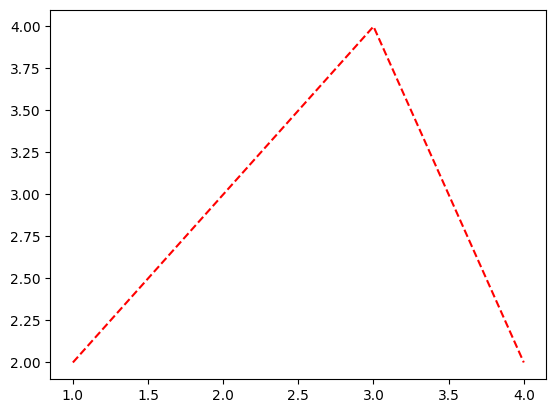

In [99]:
plt.plot([1,2,3,4], [2,3,4,2], 'r--')

In [100]:
plt.plot([1,2,3,4],[2,3,4,2],color='lime','--')  ## 키워드 인자 뒤에 위치인자가 들어간 상황!!

SyntaxError: ignored

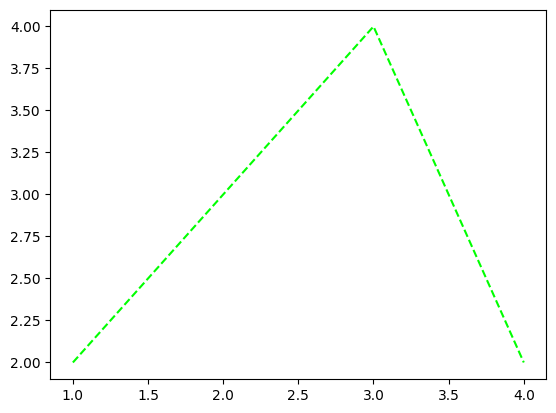

In [101]:
plt.plot([1,2,3,4],[2,3,4,2],'--',color='lime')

> 이렇게 순서대로 해야 제대로 산출이 된다.

### **B. dictionary + `pio.show()`**
---




`# 예제 1` dictionary + `pio.show()`

In [102]:
fig = dict()
fig['data'] = [
    {"type": "bar", "x": ['female'], "y": [0.42]},
    {"type": "bar", "x": ['male'], "y": [0.52]}
]  ## 리스트를 딕셔너리 밸류로 넣음
fig['layout'] = {
    "title": {"text": "Title"},
    "width": 600
}  ## 딕셔너리를 딕셔너리 밸류로 넣음

In [103]:
fig

{'data': [{'type': 'bar', 'x': ['female'], 'y': [0.42]},
  {'type': 'bar', 'x': ['male'], 'y': [0.52]}],
 'layout': {'title': {'text': 'Title'}, 'width': 600}}

> 해당 딕셔너리를 바로 이용하면...

In [105]:
pio.show(fig)

> 마치 `pio.show()`에 필요한 `kwargs`를 `fig`라는 이름의 dict로 전달하는 느낌...!

In [109]:
pio.show(dict())  ## 빈 딕셔너리 전달...

**핵심 요약 : `fig`의 본질은 `dictionary`이며, 이는 `pio.show()`에 전달할 `kwargs`를 모아놓은 집합이다.**

`# 예제 2` `female`의 rate(`y`)를 `0.62`로 수정

In [111]:
fig['data'][0]['y'] = [0.62]
fig

{'data': [{'x': ['female'], 'y': [0.62], 'type': 'bar'},
  {'x': ['male'], 'y': [0.52], 'type': 'bar'}],
 'layout': {'title': {'text': 'Title'}, 'width': 600}}

In [112]:
pio.show(fig)

`# 예제 3` `fig`에 정리된 `args`들이 전부는 아님...!

In [113]:
fig['data'][0]['marker'] = {'color' : '#636efa'}  ## 디폴트 값들
fig['data'][1]['marker'] = {'color':'#EF553B'}
fig

{'data': [{'x': ['female'],
   'y': [0.62],
   'type': 'bar',
   'marker': {'color': '#636efa'}},
  {'x': ['male'], 'y': [0.52], 'type': 'bar', 'marker': {'color': '#EF553B'}}],
 'layout': {'title': {'text': 'Title'}, 'width': 600}}

In [114]:
pio.show(fig)

> 디폴트 값이 입력된 것이라 딱히 달라지진 않는다...(입력하지 않아도 되는 키워드 인자)

## 4. `go`를 이용한 시각화

### **A. `pio`와 `go`의 연결**
---





In [115]:
fig = dict()
fig['data'] = [
    {"type": "bar", "x": ['female'], "y": [0.42]},
    {"type": "bar", "x": ['male'], "y": [0.52]}
]
fig['layout'] = {
    "title": {"text": "Title"},
    "width": 600
}
pio.show(fig)

위의 코드와 동일한 효과를 주는 코드들을 알아보자.

`# 예제 1` data의 원소를 dict로 정리하여 추가(`append()`)

In [116]:
fig = dict()
fig['data'] = list()
bar_female = {'type':'bar', "x": ['female'], "y": [0.42]}
bar_male = {'type':'bar', "x": ['male'], "y": [0.52]}
fig['data'].append(bar_female)  ## data는 딕셔너리의 리스트였다. 직접 추가해주는 모습
fig['data'].append(bar_male)
fig['layout'] = {
    "title": {"text": "Title"},
    "width": 600
}
pio.show(fig)

`# 예제 2` `go.Bar()`를 이용

In [119]:
go.Bar({"x": ['female'], "y": [0.42]})

Bar({
    'x': ['female'], 'y': [0.42]
})

In [117]:
fig = dict()
fig['data'] = list()
bar_female = go.Bar({"x": ['female'], "y": [0.42]})   ## 딕셔너리와 동일한 역할을 한다. 'type' : 'bar'라는 키워드인자가 포함되어 있다.
bar_male = go.Bar({"x": ['male'], "y": [0.52]})       ## 타입을 쓰지 않는 딕셔너리와 똑같다고 보면 됩니다...!!!
fig['data'].append(bar_female)
fig['data'].append(bar_male)
fig['layout'] = {
    "title": {"text": "Title"},
    "width": 600
}
pio.show(fig)

`# 예제 3` `go.Bar()` + `go.Figure()` + `add_trace()`를 이용

In [120]:
fig = go.Figure()
bar_female = go.Bar({"x": ['female'], "y": [0.42]})
bar_male = go.Bar({"x": ['male'], "y": [0.52]})
fig.add_trace(bar_female)   ## figure에 플랏(trace)을 추가, fig['data'].append(bar_female)와 동일
fig.add_trace(bar_male)
fig['layout'] = {
    "title": {"text": "Title"},
    "width": 600
}
#fig.show()
fig

`go.Bar()`를 아래와 같이 사용할 수도 있다.

In [121]:
# go.Bar({"x": ['female'], "y": [0.42]})
# go.Bar(dict(x=['female'],y=[0.42]))
go.Bar(x=['female'],y=[0.42])  ## 딕셔너리를 넣지 않고 위치인자를 통해 직접 넣을 수도 있음

Bar({
    'x': ['female'], 'y': [0.42]
})

**딕셔너리나 `go.Bar()`나 어떻게 입력하든 상당히 호환이 잘 된다**

사실 아래와 같이 `go.Figure()`만 이용하고, `go.Bar()`는 사용하지 않아도 무방함(수틀리면...)

In [122]:
fig = go.Figure()
bar_female = {'type':'bar', "x": ['female'], "y": [0.42]}  ## 위에서 둘이 똑같다고 했으니까...!
bar_male = {'type':'bar', "x": ['male'], "y": [0.52]}
fig.add_trace(bar_female)
fig.add_trace(bar_male)
fig['layout'] = {
    "title": {"text": "Title"},
    "width": 600
}
#fig.show()
fig

`# 예제 5` `go.Bar()` + `go.Figure()` + `add_trace()` + `update_layout()`

In [123]:
fig = go.Figure()
bar_female = go.Bar(x=['female'], y= [0.42])
bar_male = go.Bar(x=['male'], y= [0.52])
fig.add_trace(bar_female)
fig.add_trace(bar_male)
fig.update_layout(
    {"title": {"text": "Title"},
    "width": 600}
)
fig

> 사실 `layout`을 딕셔너리로 지정하지 않고 위치인자로 지정해도 된다.

In [125]:
fig = go.Figure()
bar_female = go.Bar(x=['female'], y= [0.42])
bar_male = go.Bar(x=['male'], y= [0.52])
fig.add_trace(bar_female)
fig.add_trace(bar_male)
fig.update_layout(
    title = {"text": "Title"},
    width = 600
)
fig

`# 예제 6` `go.Bar()` + `go.Figure()` + `add_traces()` + `update_layout()`

In [126]:
fig = go.Figure()
bar_female = go.Bar(x=['female'], y= [0.42])
bar_male = go.Bar(x=['male'], y= [0.52])
fig.add_traces([bar_female,bar_male])  ## 한번에 업데이트 할 수도 있다.
fig.update_layout(
    {"title": {"text": "Title"},
    "width": 600}
)
fig

### **B. `go`를 이용하는 공식적인 추천포맷**
---




In [127]:
fig = go.Figure()
fig.add_traces(
    [go.Bar(x=['female'], y= [0.42]),
     go.Bar(x=['male'], y= [0.52])]
)
fig.update_layout(
    title = "버클리대학교 성별합격률",
    width = 600,
    legend = {'title':'gender'}

)

`-` `go.Figure()`로 피규어를 생성하고, `fig.add_traces()`에 리스트로 `go.Bar()`를 이용하여 개체를 넣어준 뒤, `fig.update_layout()`에 위치인자를 지정하여 옵션을 부여한다!